In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64) (1797,)
[[  0.   0.   0.  12.  13.   5.   0.   0.]
 [  0.   0.   0.  11.  16.   9.   0.   0.]
 [  0.   0.   3.  15.  16.   6.   0.   0.]
 [  0.   7.  15.  16.  16.   2.   0.   0.]
 [  0.   0.   1.  16.  16.   3.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   0.  11.  16.  10.   0.   0.]]


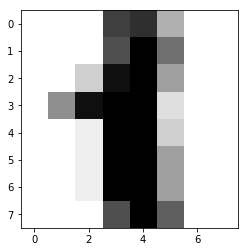

In [16]:
digits = datasets.load_digits()
print (digits.keys())
print(digits.data.shape,digits.target.shape)
plt.imshow(digits.images[1],cmap=plt.cm.gray_r)
print (digits.images[1])

### knn 模型

In [17]:
# 构造knn模型---不进行数据预处理
knn = KNeighborsClassifier(n_neighbors=3)
print(knn)
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25)
knn.fit(x_train,y_train)
print("训练集精度：",knn.score(x_train,y_train))
print("测试集精度：",knn.score(x_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
训练集精度： 0.992576095026
测试集精度： 0.984444444444


### pytorch神经网络

In [18]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 使用 Sequential 定义 4 层神经网络
net = nn.Sequential(
    nn.Linear(64, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)
# 定义 loss 函数---交叉熵
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 1e-1) # 使用随机梯度下降，学习率 0.1

In [21]:
# 我们训练 5000 次
for e in range(1000):
    out = net(Variable(torch.from_numpy(x_train)).float())
    loss = criterion(out, Variable(torch.from_numpy(y_train)).long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if ((e + 1) % 1000 == 0) or e == 1:
        print('epoch: {}, loss: {}'.format(e+1, loss))

epoch: 2, loss: 0.004933908581733704
epoch: 1000, loss: 0.0005912493797950447


In [22]:
out = net(Variable(torch.from_numpy(x_train)).float())
print(out.shape)
# pred = out[0].index(max(out[0]))
a = 0
k = 0
for i in out:
#     print(("%d"%(y_train[a]-list(i.detach().numpy()).index(max(i)))))
    
    if (y_train[a]-list(i.detach().numpy()).index(max(i))) == 0:
        k += 1
    a += 1
print("k = %d"% k)
print("训练集正确率为：",k/1347)
# print(("目标值：%d,预测值：%d"%(y_train[1],list(out[1].detach().numpy()).index(max(out[1])))))
# print(list(out[0].detach().numpy()).index(max(out[0])))

torch.Size([1347, 10])
k = 1347
训练集正确率为： 1.0


In [23]:
out_c =  net(Variable(torch.from_numpy(x_test)).float())
print(out_c.shape)
k = 0
print(out_c[0])
print(y_test[0])
a = 0
for j in out_c:
    if (y_test[a]-list(j.detach().numpy()).index(max(j))) == 0:
        k += 1
    a += 1
print("k = %d"% k)
print("测试集正确率为：",k/450)

torch.Size([450, 10])
tensor([ -0.7805,   6.2726,  13.7328,  -5.9961,  -7.6731,   0.0932,   4.7489,
        -11.4501,   4.1438,  -7.8431], grad_fn=<SelectBackward>)
2
k = 439
测试集正确率为： 0.9755555555555555


### sklearn中的神经网络框架

In [24]:
# 调库
from sklearn.neural_network import MLPClassifier
# 实例化一个人工神经网络
net = MLPClassifier(solver="sgd",hidden_layer_sizes=(50,40))
net.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
print("训练集精度；",net.score(x_train,y_train))
print("测试集精度；",net.score(x_test,y_test))

训练集精度； 0.998515219005
测试集精度； 0.964444444444


### SVM

In [32]:
from sklearn import svm
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3,random_state=0)
svm_classifier = svm.SVC(C=100, kernel='rbf', decision_function_shape='ovr', gamma=0.001,random_state=42)
svm_classifier.fit(x_train,y_train)
print("训练集精度；",svm_classifier.score(x_train,y_train))
print("测试集精度；",svm_classifier.score(x_test,y_test))
print(svm_classifier)

训练集精度； 1.0
测试集精度； 0.990740740741
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
